In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def gravity_anomaly_sphere(x0,y0,z0,a,rho,x,y,z):
    
    """
    x0,y0,z0 - coordenadas do centro da esfera (km)
    a - raio da esfera (km)
    rho - densidade (kg.m^-3)
    x,y,z - coordenadas onde a medida é tomada
    
    Output
    gx,gy,gz - componentes do campo em unidades de mGal
    """
    
    gamma = 6.67*(10**(-11))
    si2mg = 10**5
    km2m = 10**3
    rx, ry, rz = x-x0, y-y0, z-z0
    r = np.sqrt(rx**2+ry**2+rz**2)
    
    if 0 in r:
        return 'parâmetro invalido'
    else:
        mass = 4*np.pi*rho*(a**3)/3
        return (-gamma*si2mg*km2m)*mass*np.asarray((rx,ry,rz))/(r**3)
    
#============================================ Funções de Plotagem ==========================================

def plot_grav_map(X,Y,gz,y_max=None,y_perf=None,x_perf=None,
                  figsize=(12,6),cmap='nipy_spectral',location='bottom',
                 levels=50,perfil='horizontal',cbar_label= r'$g_z$ (mGal)'):
    
    fig, axes= plt.subplots(ncols=2,figsize=figsize)
    
    axes[0].set_aspect('equal')
    
    if perfil=='horizontal':
        axes[0].hlines(y=y_perf,xmin=X.min(),xmax=X.max(),color='white',ls='--',lw=1)
        axes[1].plot(X[Y==y_perf],gz[Y==y_perf],color='black')
        axes[1].set_xlabel('X')
        axes[1].set_ylabel(cbar_label)
    elif perfil=='vertical':
        axes[0].vlines(x=x_perf,ymin=Y.min(),ymax=Y.max(),color='white',ls='--',lw=1)
        axes[1].plot(Y[X==x_perf],gz[X==x_perf],color='black')
        axes[1].set_xlabel('Y')
        axes[1].set_ylabel(cbar_label)
    else:
        pass
    
    axes[0].set_xlim(X.min(),X.max())
    axes[0].set_ylim(Y.min(),Y.max())
    axes[0].set_aspect('equal')

    
    c_bar_ticks = np.linspace(gz.min(),gz.max(),4)
    
    ax = axes[0].contourf(X,Y,gz,cmap=cmap,levels=levels)
    
    cbar = fig.colorbar(ax,ax=axes[0],label=cbar_label,ticks=c_bar_ticks)
    return fig,axes

In [4]:
#Criando uma malha
n_x, n_y = 51,51           #número de amostras na direção x e y
x_min, x_max = -0.25,0.25  #Intervalo em x
y_min, y_max = -0.25,0.25  #Intervalo em y

x0,y0,z0 = 0.0, 0.0, 0.05  #Coordendas do centro da esfera

a = 0.01                   #raio da esfera

rho = 2700                 #densidade da esfera

xi,yi = np.linspace(x_min,x_max,n_x), np.linspace(y_min,y_max,n_y)

X,Y = np.meshgrid(xi,yi) #criando malha

gx,gy,gz = gravity_anomaly_sphere(x0,y0,z0,a,rho,X,Y,np.zeros_like(X))

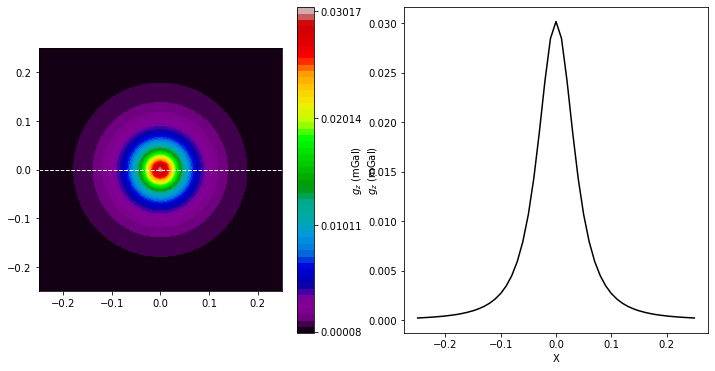

In [5]:
#Tomando um perfil horizantal cortando o centro da anomalia
fig, axes = plot_grav_map(X,Y,gz,y_perf=0.0,perfil='horizontal')

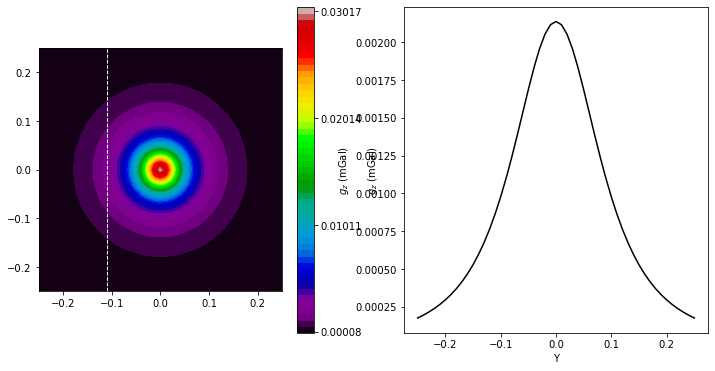

In [6]:
#Tomando um perfil horizantal cortando o centro da anomalia
fig, axes = plot_grav_map(X,Y,gz,x_perf=X[0][14],perfil='vertical')

#### Vamos analisar a componente $g_x$

In [7]:
Y[:,0]

array([-0.25, -0.24, -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17,
       -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08,
       -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,
        0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,
        0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19,
        0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25])

(<Figure size 864x432 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:xlabel='X', ylabel='$g_x$ (mGal)'>],
       dtype=object))

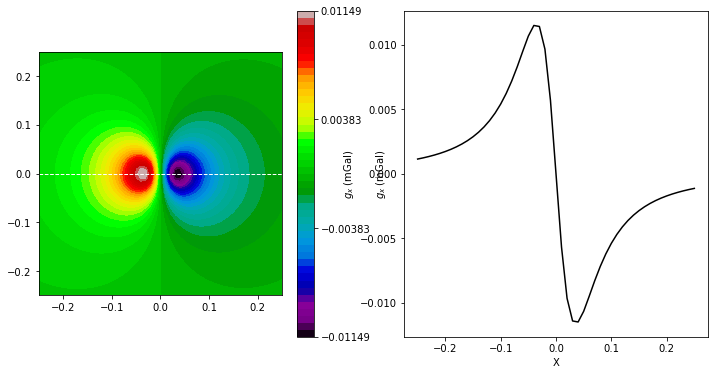

In [8]:
plot_grav_map(X,Y,gx,y_perf=0.0,perfil='horizontal',cbar_label=r'$g_x$ (mGal)')

(<Figure size 864x432 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:xlabel='Y', ylabel='$g_x$ (mGal)'>],
       dtype=object))

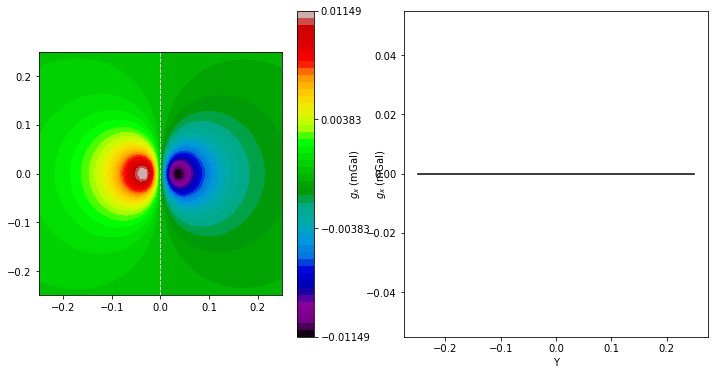

In [9]:
plot_grav_map(X,Y,gx,x_perf=0.0,perfil='vertical',cbar_label=r'$g_x$ (mGal)')

(<Figure size 864x432 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:xlabel='Y', ylabel='$g_x$ (mGal)'>],
       dtype=object))

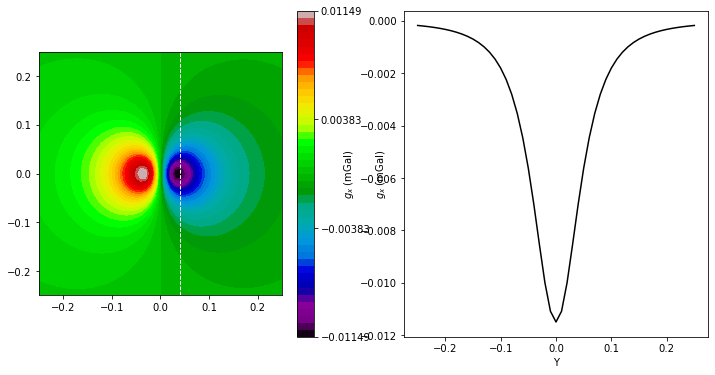

In [109]:
plot_grav_map(X,Y,gx,x_perf=X[0][29],perfil='vertical',cbar_label=r'$g_x$ (mGal)')

#### Vamos analisar a componente $g_y$

(<Figure size 864x432 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:xlabel='Y', ylabel='$g_x$ (mGal)'>],
       dtype=object))

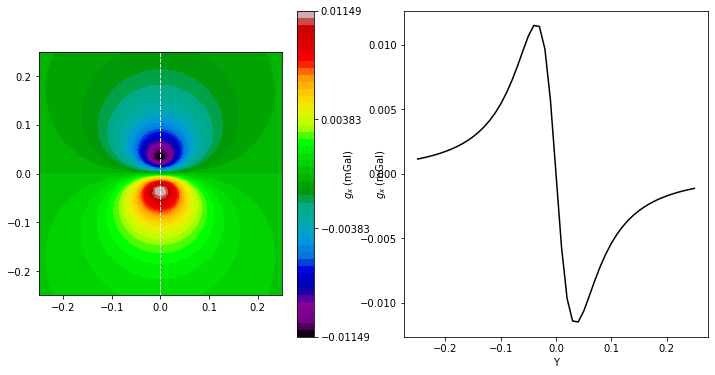

In [10]:
plot_grav_map(X,Y,gy,x_perf=0.0,perfil='vertical',cbar_label=r'$g_x$ (mGal)')